In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from helpers import *

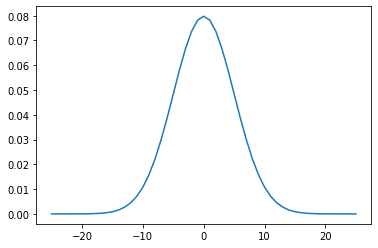

In [15]:
sigma = 5
g, gx = gaussian1DKernel(sigma)
factor = 5
h = np.ceil(factor*sigma)
x = np.arange(-h, h+1)
plt.plot(x,g)

In [16]:
def gaussianSmoothing(image, sigma):
    g,gx = gaussian1DKernel(sigma)
    blured = cv2.filter2D(image, -1, g)
    blured = cv2.filter2D(blured, -1, g.T)
    Ix = cv2.filter2D(image, -1, gx.T)
    Ix = cv2.filter2D(Ix, -1, g)
    Iy = cv2.filter2D(image, -1, gx)
    Iy = cv2.filter2D(Iy, -1, g.T)
    return (blured,Ix,Iy)

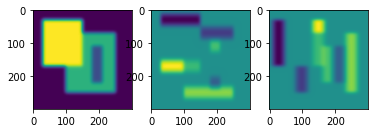

In [17]:
im = cv2.imread("data/ex6/TestIm1.png")[:,:,::-1]
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im = im.astype(np.float32)
I, Ix, Iy = gaussianSmoothing(im, sigma)
fig, axs = plt.subplots(1,3)
axs[0].imshow(I)
axs[1].imshow(Ix)
axs[2].imshow(Iy)

In [18]:
def smoothedHessian(im, sigma, epsilon: int):
    if epsilon < 1:
        epsilon = 1
    epsilon = int(epsilon)
    g,_ = gaussian1DKernel(sigma)
    ge = np.repeat(g,epsilon,axis=1)
    I, Ix, Iy = gaussianSmoothing(im, sigma)
    return np.array([
        [cv2.filter2D(Ix**2, -1, ge), cv2.filter2D(Ix*Iy, -1, ge)],
        [cv2.filter2D(Ix*Iy, -1, ge), cv2.filter2D(Iy**2, -1, ge)],
    ])

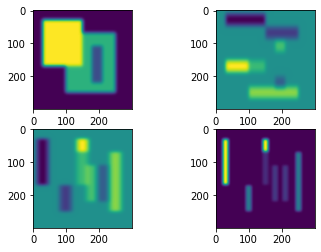

In [19]:
im = cv2.imread("data/ex6/TestIm1.png")[:,:,::-1]
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im = im.astype(np.float32)
sigma = 3
epsilon = 1
C = smoothedHessian(im, sigma, epsilon)
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(C[0,0,:])
axs[0, 1].imshow(C[0,1,:])
axs[1, 0].imshow(C[1,0,:])
axs[0, 0].imshow(I)
axs[0, 1].imshow(Ix)
axs[1, 0].imshow(Iy)
axs[1, 1].imshow(C[1,1,:])

In [20]:
def harrisMeasure(im, sigma, epsilon, k):
    C = smoothedHessian(im, sigma, epsilon)
    r = C[0,0,:]*C[1,1,:] - C[0,1,:]*C[1,0,:] - k * (C[0,0,:] + C[1,1,:])
    r /= r.max()
    return r

(<matplotlib.image.AxesImage at 0x1b6c44874c0>, 1.0)

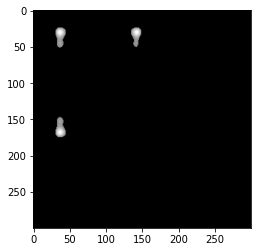

In [21]:
k = .05
epsilon = 2
sigma = 5
im = cv2.imread("data/ex6/TestIm1.png")[:,:,::-1]
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im = im.astype(np.float32)
r = harrisMeasure(im, sigma, epsilon, k)
r[r < .5] = 0
plt.imshow(r,cmap='gray'), r.max()

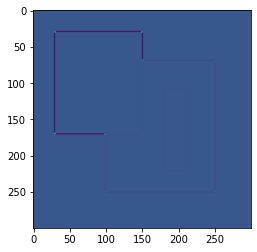

In [22]:
dst = cv2.cornerHarris(im,2,3,0.04)
plt.imshow(dst)

In [23]:
from scipy import ndimage
### Non-maximum supression
image = cv2.imread("data/ex6/TestIm1.png")[:,:,::-1].astype(np.float64)
image /= image.max()

# Use the max "filter to make a mask
roi = 3
size = 2 * roi + 1
image_max = ndimage.maximum_filter(image, size=size, mode='constant')
mask = (image == image_max)
image *= mask

# Remove the image borders
image[:roi] = 0
image[-roi:] = 0
image[:, :roi] = 0
image[:, -roi:] = 0

# Optionally find peaks above some threshold
image_t = (image > .99) * 1

# # get coordinates of peaks
f = np.transpose(image_t.nonzero())
f.shape

(51183, 3)

(<matplotlib.image.AxesImage at 0x1b6c2c7da00>, 1)

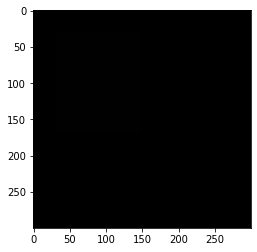

In [24]:
plt.imshow(image_t), image_t.max()

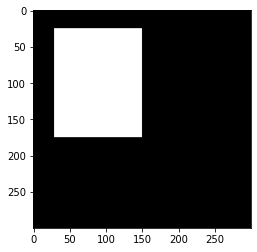

In [25]:
dilated = cv2.dilate((image_t*255).astype(np.uint8), np.ones(10,dtype=np.uint8))
plt.imshow(dilated)

# Canny

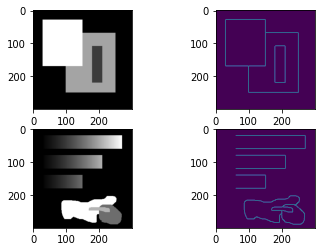

In [26]:
im1 = cv2.imread('data/ex6/TestIm1.png')[:,:,::-1]
im2 = cv2.imread('data/ex6/TestIm2.png')[:,:,::-1]
edges1 = cv2.Canny(im1,100,200)
edges2 = cv2.Canny(im2,100,200)
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(im1)
axs[0, 1].imshow(edges1)
axs[1, 0].imshow(im2)
axs[1, 1].imshow(edges2)